# Unsupervised Learning 

## Clustering

### K-Means

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

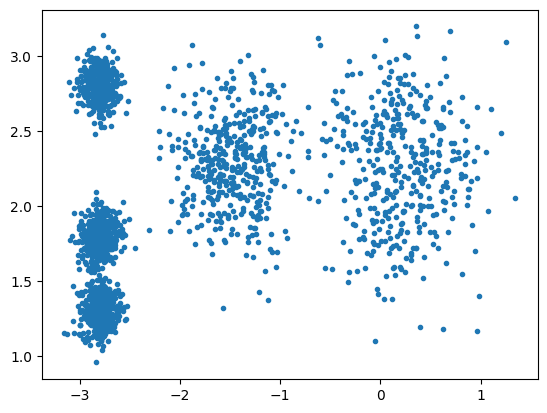

In [7]:
plt.plot(X[:,0],X[:,1], ".")

In [50]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5,n_init=100)
y_pred=kmeans.fit_predict(X)

In [35]:
y_pred

array([4, 1, 0, ..., 3, 0, 1])

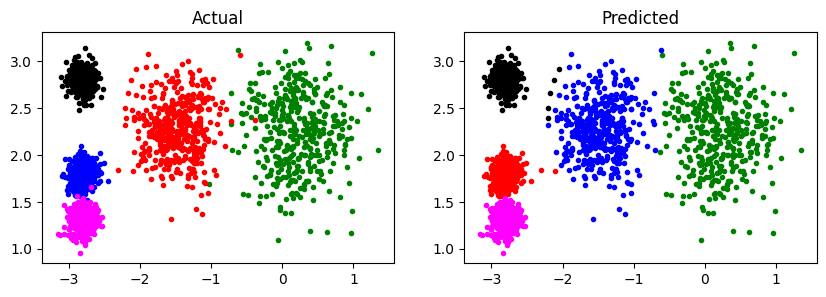

In [49]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
colors={0: "green",1:"red",2:"blue",3:"black",4:"magenta"}
axes[0].set_title("Actual")
for i in range(5):
    axes[0].plot(X[y==i,0],X[y==i,1], ".", label=i, color=colors[i])

axes[1].set_title("Predicted")
for i in range(5):
    axes[1].plot(X[y_pred==i,0],X[y_pred==i,1], ".", label=str(i)+"pred", color=colors[i])

all the clusters were identified. the predicted green points near the black cluster (predicted) actually should correspond to the black class.

In [37]:
kmeans.inertia_

211.5985372581684

In [40]:
kmeans.labels_.shape

(2000,)

### choosing the optimal number of clusters

In [42]:
intertias=[]
for i in range(2,10,1):
    kmeans=KMeans(n_clusters=i).fit(X)
    intertias.append(kmeans.inertia_)

Text(0.5, 0, 'number of clusters')

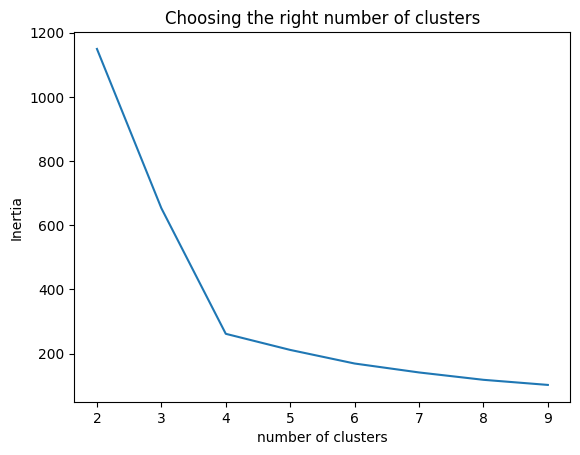

In [44]:
plt.plot(range(2,10,1),intertias)
plt.title("Choosing the right number of clusters")
plt.ylabel("Inertia")
plt.xlabel("number of clusters")

In [45]:
from sklearn.metrics import silhouette_score
silh=[]
for i in range(2,10,1):
    kmeans=KMeans(n_clusters=i).fit(X)
    silh.append(silhouette_score(X,kmeans.labels_))

Text(0.5, 0, 'number of clusters')

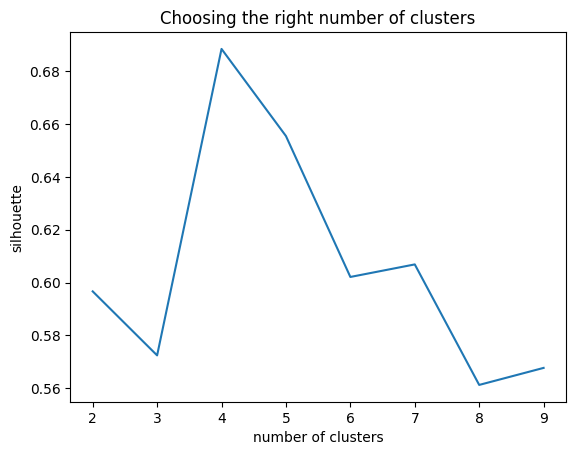

In [47]:
plt.plot(range(2,10,1),silh)
plt.title("Choosing the right number of clusters")
plt.ylabel("silhouette")
plt.xlabel("number of clusters")
#-1 means wrong clusters
#0 close to a cluster boundary
# 1 everything is well inside its own clusters

### training a softmax regression on the bulb dataset

In [53]:
X.shape

(2000, 2)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=300)

In [62]:
from sklearn.linear_model import LogisticRegression

log_clf=LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
log_clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [64]:
log_clf.predict(X_test)==y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Exercices:

## Cluster the Olivetti Faces Dataset

### load data

In [66]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Lenovo\scikit_learn_data


In [ ]:
olivetti

### train,val,test, build the K-Means model with optimal n_clusters

In [76]:
from sklearn.model_selection import train_test_split

X_train_val, X_test,y_train_val,y_test=train_test_split(olivetti.data,olivetti.target, stratify=olivetti.target)
X_train, X_val,y_train,y_val=train_test_split(X_train_val,y_train_val, stratify=y_train_val)

In [80]:
from sklearn.metrics import silhouette_score

In [84]:
from sklearn.cluster import KMeans

#silhoutte=[]
#values=[]
for n in range(120,170):
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(X_train)
    values.append(kmeans.inertia_)
    silhoutte.append(silhouette_score(X_train, kmeans.labels_))

Text(0, 0.5, 'Inertia')

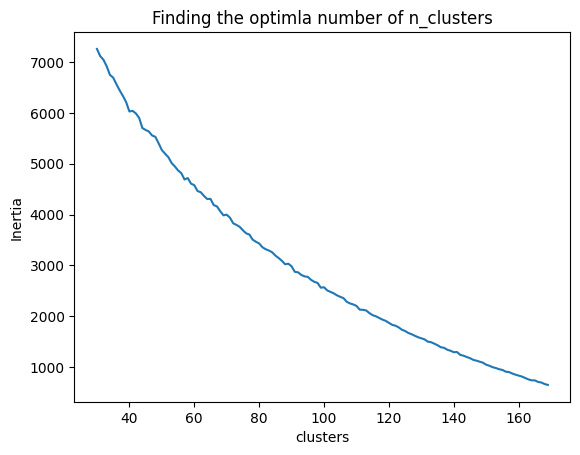

In [85]:
plt.plot(range(30,170,1), values)
plt.title("Finding the optimla number of n_clusters")
plt.xlabel("clusters")
plt.ylabel("Inertia")

In [91]:
silhoutte.index(max(silhoutte))

21

In [93]:
max(silhoutte)

0.19872317

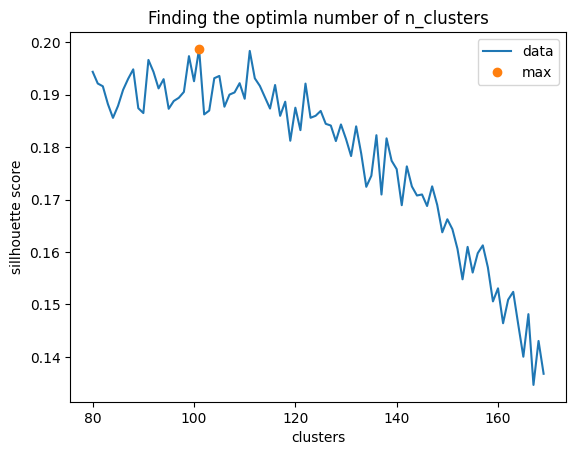

In [96]:
plt.plot(range(80,170,1), silhoutte,label="data")
plt.plot(101, max(silhoutte), "o", label="max")
plt.title("Finding the optimla number of n_clusters")
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.legend()

since, the number of clusters is quite high, I would use just the highest from the silhouette: $101$ clusters!

now, lets understand what faces were grouped together:

### visualising faces

In [102]:
kmeans_best=KMeans(n_clusters=101)
kmeans_best.fit(X_train)

KMeans(n_clusters=101)

In [115]:
X_train[0:2,:].shape

(2, 4096)

In [143]:
def faces(images, labels):
    """show corresponding faces to each cluster
    Input: all images corresponding to the cluster"""
    
    ncols=len(images)
    plt.figure(figsize=(ncols*1,1))
    images=images.reshape(-1,64,64) 
    ##plot each cluster:
    print("Cluster: {:d}".format(labels))
    index=1
    for im in images:
        plt.subplot(1,ncols, index)
        plt.imshow(im,cmap="gray")
        plt.axis("off")
        index+=1
    plt.show()

Cluster: 0


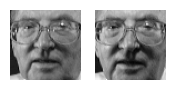

Cluster: 1


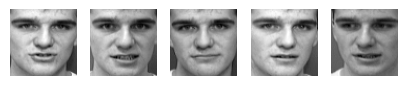

Cluster: 2


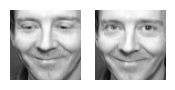

Cluster: 3


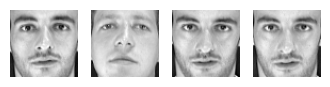

Cluster: 4


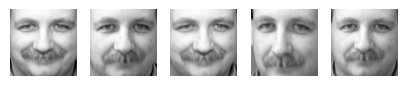

Cluster: 5


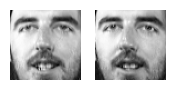

Cluster: 6


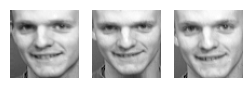

Cluster: 7


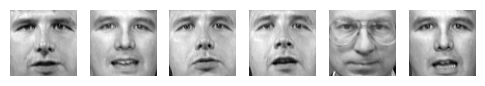

Cluster: 8


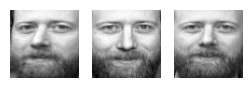

Cluster: 9


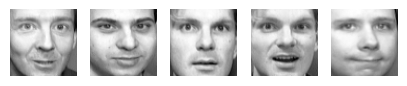

Cluster: 10


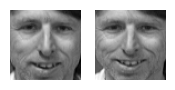

Cluster: 11


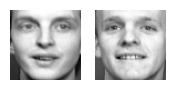

Cluster: 12


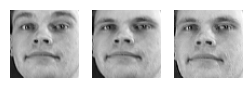

Cluster: 13


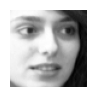

Cluster: 14


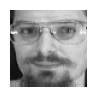

Cluster: 15


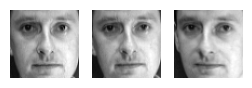

Cluster: 16


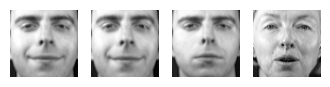

Cluster: 17


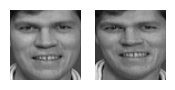

Cluster: 18


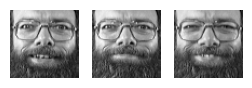

Cluster: 19


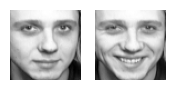

Cluster: 20


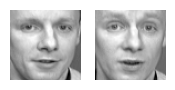

Cluster: 21


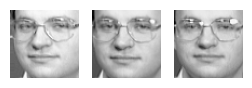

Cluster: 22


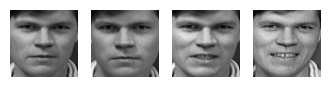

Cluster: 23


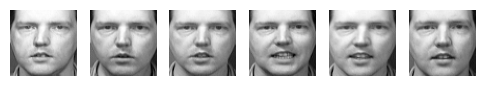

Cluster: 24


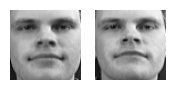

Cluster: 25


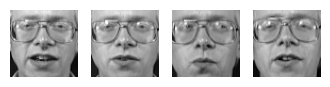

Cluster: 26


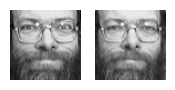

Cluster: 27


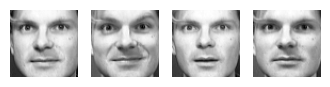

Cluster: 28


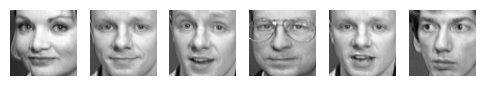

Cluster: 29


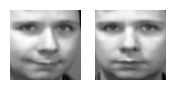

Cluster: 30


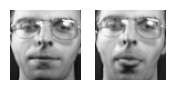

Cluster: 31


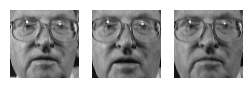

Cluster: 32


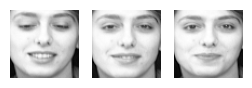

Cluster: 33


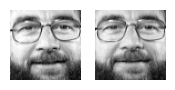

Cluster: 34


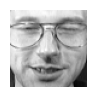

Cluster: 35


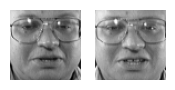

Cluster: 36


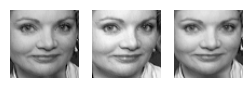

Cluster: 37


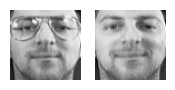

Cluster: 38


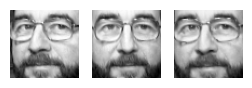

Cluster: 39


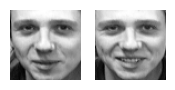

Cluster: 40


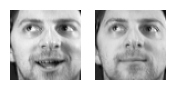

Cluster: 41


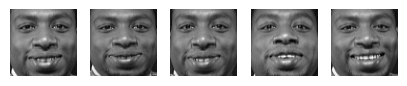

Cluster: 42


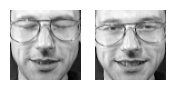

Cluster: 43


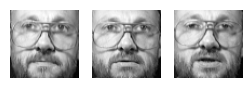

Cluster: 44


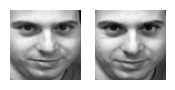

Cluster: 45


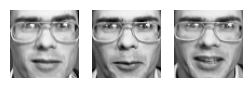

Cluster: 46


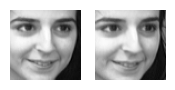

Cluster: 47


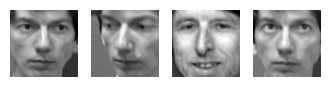

Cluster: 48


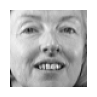

Cluster: 49


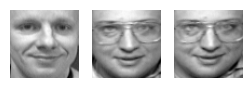

Cluster: 50


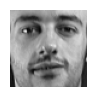

Cluster: 51


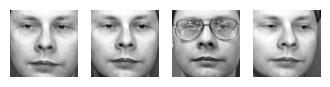

Cluster: 52


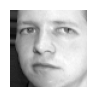

Cluster: 53


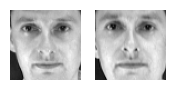

Cluster: 54


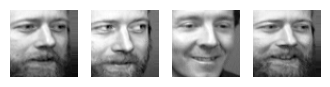

Cluster: 55


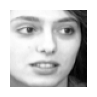

Cluster: 56


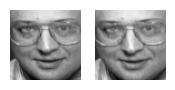

Cluster: 57


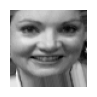

Cluster: 58


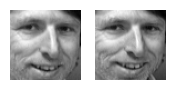

Cluster: 59


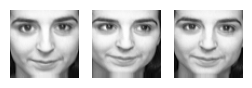

Cluster: 60


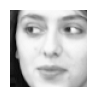

Cluster: 61


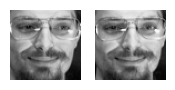

Cluster: 62


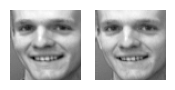

Cluster: 63


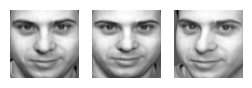

Cluster: 64


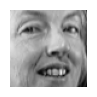

Cluster: 65


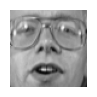

Cluster: 66


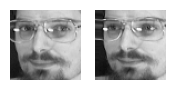

Cluster: 67


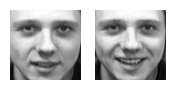

Cluster: 68


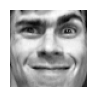

Cluster: 69


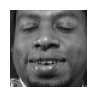

Cluster: 70


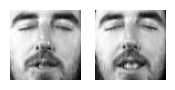

Cluster: 71


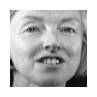

Cluster: 72


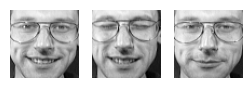

Cluster: 73


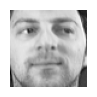

Cluster: 74


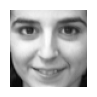

Cluster: 75


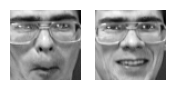

Cluster: 76


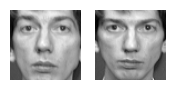

Cluster: 77


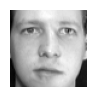

Cluster: 78


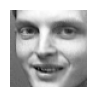

Cluster: 79


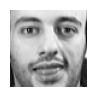

Cluster: 80


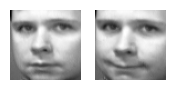

Cluster: 81


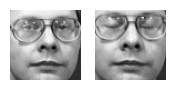

Cluster: 82


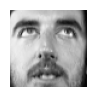

Cluster: 83


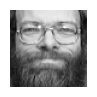

Cluster: 84


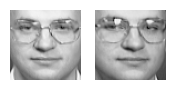

Cluster: 85


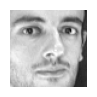

Cluster: 86


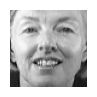

Cluster: 87


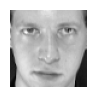

Cluster: 88


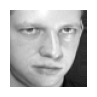

Cluster: 89


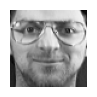

Cluster: 90


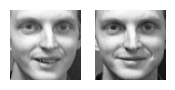

Cluster: 91


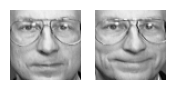

Cluster: 92


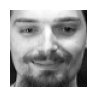

Cluster: 93


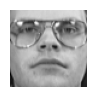

Cluster: 94


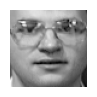

Cluster: 95


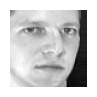

Cluster: 96


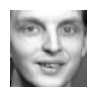

Cluster: 97


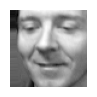

Cluster: 98


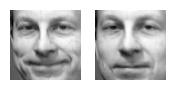

Cluster: 99


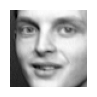

Cluster: 100


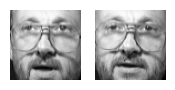

In [144]:
for k in np.unique(kmeans_best.labels_):
    images=X_train[kmeans_best.labels_==k,:]
    faces(images,k)

## Using Clustering as Preprocessing for Classification

### training a Logistic Regression (multinomial) classifier

In [148]:
from sklearn.linear_model import LogisticRegression

log_clf=LogisticRegression(multi_class="multinomial",max_iter=10000)
log_clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [151]:
from sklearn.metrics import accuracy_score as acc, precision_score as pre, recall_score as rec
y_pred_train=log_clf.predict(X_train)
acc(y_train,y_pred_train)

1.0

In [154]:
y_pred_val=log_clf.predict(X_val)
acc(y_val,y_pred_val)

0.9733333333333334

### now with reduced dimensions from KMeans:

In [155]:
X_reduced=kmeans_best.fit_transform(X_train)

log_red_clf=LogisticRegression(multi_class="multinomial",max_iter=10000)
log_red_clf.fit(X_reduced,y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [160]:
X_reduced_val=kmeans_best.transform(X_val)
y_pred_red_val=log_red_clf.predict(X_reduced_val)
acc(y_val,y_pred_red_val)

0.92

a slight decrease. With what number of clusters can we get the best performance?

In [164]:
from sklearn.pipeline import Pipeline



for clusters in range(5,140,5): #changed to "5" step to run faster
    pipeline=Pipeline([
        ("kmeans", KMeans(n_clusters=clusters)),
        ("logistic_reg", LogisticRegression(multi_class="multinomial",max_iter=5000))
    ])
    pipeline.fit(X_train,y_train)
    print(clusters, acc(y_val, pipeline.predict(X_val)))

5 0.5066666666666667
10 0.68
15 0.7466666666666667
20 0.8
25 0.8666666666666667
30 0.8666666666666667
35 0.88
40 0.9333333333333333
45 0.92
50 0.9333333333333333
55 0.92
60 0.9333333333333333
65 0.92
70 0.9333333333333333
75 0.9333333333333333
80 0.9333333333333333


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


85 0.92
90 0.9066666666666666
95 0.92
100 0.9333333333333333
105 0.9333333333333333
110 0.92
115 0.9066666666666666
120 0.9066666666666666
125 0.92
130 0.8933333333333333
135 0.9333333333333333


best one: 0.93, still far away from 0.97

"*What if you append the features from the reduced set to the original features (again, searching for the best num‐ ber of clusters)?*""

In [170]:
X_new_train=np.append(X_train, X_reduced, axis=1)
X_new_val=np.append(X_val, X_reduced_val, axis=1)

In [172]:
pipeline=Pipeline([
        ("logistic_reg", LogisticRegression(multi_class="multinomial",max_iter=5000))
    ])
pipeline.fit(X_new_train, y_train)

Pipeline(steps=[('logistic_reg',
                 LogisticRegression(max_iter=5000, multi_class='multinomial'))])

In [173]:
acc(y_val, pipeline.predict(X_new_val))

0.9333333333333333

the same 0.9333 even with more features, it seems that in our case the KMeans does not help at all.

## A Gaussian Mixture Model for the Olivetti Faces Dataset

In [175]:
from sklearn.mixture import GaussianMixture

gauss_mix=GaussianMixture(n_components=40) #40 people
y_pred=gauss_mix.fit_predict(X_train)

MemoryError: Unable to allocate 5.00 GiB for an array with shape (40, 4096, 4096) and data type float64

do not have resources right now, so just the ideas:

- train it, generate some images with it
- try to check wheterh the anomaly detection works with the Gaussian Mixture

## Using Dimensionality Reduction Techniques for Anomaly Detection

check whether, the PCA anomality detection works: fit PCA with 99% variance ration, then generate some unreal images and inverse_trasform them, so the reconstruction error should be huge.-> anomaly detection